# Here we explore basic aspects of plots of sinusoids and related stuff.
Neste notebook, serão explorados alguns aspectos elementares de ondas senoidas e representação da resposta destes circuitos .
Última atualização: 28 de setembro de 2020

# Importa as bibliotecas numpy e matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#****************************
# Setting up plot configurations
# Configurando gráficos
#****************************
#Adjusting fonts pattern
#Ajsutando fontes padrão dos gráficos
font = { 'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
#Ajsutando espessura das linhas padrão dos gráficos
plt.rcParams['lines.linewidth'] = 2;

Gerar os grafícos no próprio notebook, ao invés de uma janela separada:

Graficando funções senoidas com diferença de fase:

# Aula 1

## Defasagem

(-1.1, 1.1)

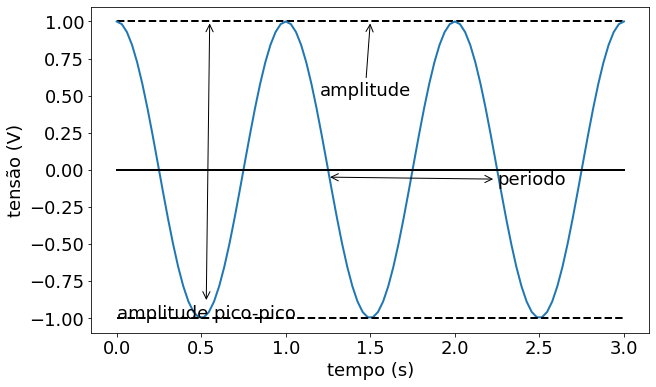

In [2]:
#------------------------
t = np.linspace(0, 3,100)
phi = np.pi/6
y0 = np.cos(2*np.pi*t)
#criando vetores para representar
y1 = 0*t+1
y2 =  0*t-1
y3 =  0*t
#------------------------
fig = plt.figure(figsize=(10,6))
fig1 = plt.plot(t,y1,'--k',t,y0,t,y2,'--k',t,y3,'-k')
#------------
plt.annotate(
        'amplitude',
        xy=(1.5,1), arrowprops=dict(arrowstyle='->'), xytext=(1.2, .5))
#------------
plt.annotate(
        'amplitude pico-pico',
        xy=(0.55,1), arrowprops=dict(arrowstyle='<->'), xytext=(0.0, -1))
#------------
plt.annotate(
        'periodo',
        xy=(1.25,-0.05), arrowprops=dict(arrowstyle='<->'), xytext=(2.25, -0.1))
##------------
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
#------------------------------------
#fig.savefig('onda_ac.pdf')

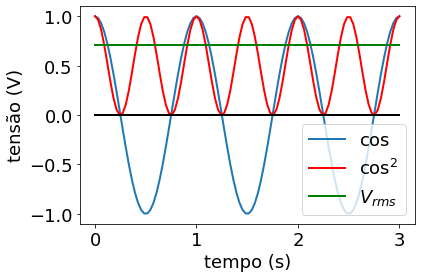

In [3]:
#------------------------
t = np.linspace(0, 3,100)
phi = np.pi/6
y0 = np.cos(2*np.pi*t)
y1 = 0*t+1/2**(0.5)
y2 =  0*t-1
y3 =  0*t
y5 = np.cos(2*np.pi*t)**2
#------------------------
fig = plt.figure()
fig1 = plt.plot(t,y0,t,y5,'-r',t,y1,'-g',t,y3,'-k')
#------------
##------------
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
plt.legend(iter(fig1), ('$\cos$', '$\cos^2$','$V_{rms}$'),loc='lower right')
#------------------------------------
#fig.savefig('onda_ac_rms.pdf')

(-1.1, 1.1)

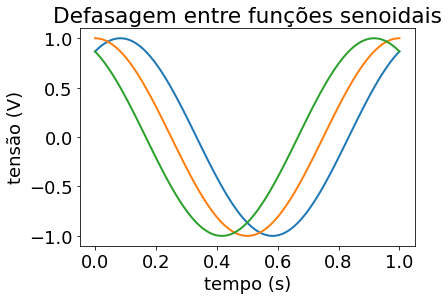

In [4]:
#------------------------
t = np.linspace(0, 1,100)
phi = np.pi/6
y0 = np.cos(2*np.pi*t)
y1 = np.cos(2*np.pi*t-phi)
y2 = np.cos(2*np.pi*t+phi)
#------------------------
# plt.xkcd()
fig = plt.figure()
fig1 = plt.plot(t,y1,t,y0,t,y2)
#
plt.title('Defasagem entre funções senoidais')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
#plt.legend(iter(fig1), ('-pi/6 (atr.)', '0','+pi/6 (adi.)'),loc='upper right')
#------------------------------------
#fig.savefig('defasagem1.pdf')

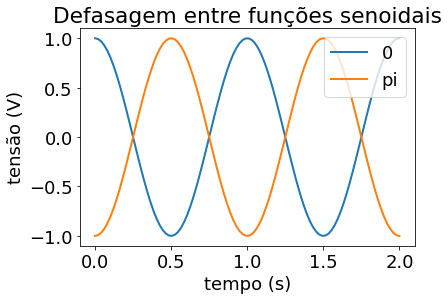

In [5]:
#------------------------
t = np.linspace(0, 2,100)
phi = np.pi
y0 = np.cos(2*np.pi*t)
y1 = np.cos(2*np.pi*t-phi)
#------------------------
#plt.xkcd()
fig = plt.figure()
fig1 = plt.plot(t,y0,t,y1)
#
plt.title('Defasagem entre funções senoidais')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
plt.legend(iter(fig1), ('0','pi'),loc='upper right')
#------------------------------------
#fig.savefig('defasagem2.pdf')

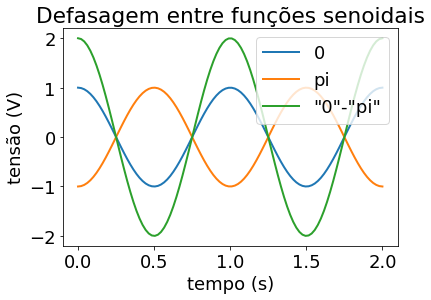

In [6]:
#------------------------
t = np.linspace(0, 2,100)
phi = np.pi
y0 = np.cos(2*np.pi*t)
y1 = np.cos(2*np.pi*t-phi)
#------------------------
# plt.xkcd()
fig = plt.figure()
fig1 = plt.plot(t,y0,t,y1,t,y0-y1)
#
plt.title('Defasagem entre funções senoidais')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-2.0,2.0]))
plt.legend(iter(fig1), ('0','pi','"0"-"pi"'),loc='upper right')
#------------------------------------
#fig.savefig('defasagem3.pdf')

## Função resposta, diagramas de Bode

In [7]:
omega=np.logspace(0,6,200)
lomega=np.log10(omega)
C=1e-3;
L=1e-3;
R=.5;
j=complex(0,1);
Xc=1/(omega*C);
Xl=omega*L;
#componente de saída: resistor
Hr = R/(R+j*(Xl-Xc))
Tr=np.abs(Hr)
Trdb=20*np.log10(Tr)
#componente de saída:capacitor
Hc = -j*Xc/(R+j*(Xl-Xc))
Tc=np.abs(Hc)
Tcdb=20*np.log10(Tc)
#componente de saída: indutor
Hl = j*Xl/(R+j*(Xl-Xc))
Tl=np.abs(Hl)
Tldb=20*np.log10(Tl)

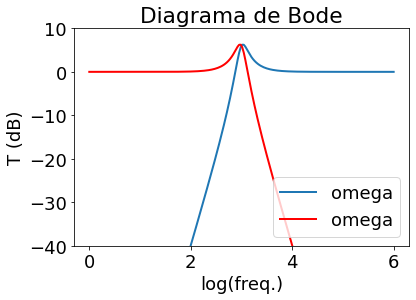

In [8]:
name='bode_rlc_l'
#plt.title('My first plot example, $alpha=\frac{2}{3}$')
#****************************
#AMPLITUDE
#****************************
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(lomega,100*np.angle(Hr,deg=True),'--k',linewidth=2,label='omega')
ax.plot(lomega,Tldb,lomega,Tcdb,'-r',linewidth=2,label='omega')
#ax.plot(lomega,Tcdb,'-g',linewidth=2)
#ax.plot(lomega,Tldb,'-b',linewidth=2)
ax.set_ylim((-40,10))
ax.set_title('Diagrama de Bode')
ax.set_xlabel('log(freq.)')
ax.set_ylabel('T (dB)')
ax.legend(loc='lower right')